In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from typing import List

'''
None || 20000
'''
nb = None
nb_trains = nb
nb_valids = nb
nb_tests = nb

In [38]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [39]:
# cd drive/MyDrive/Projects/JPX_Tokyo_Stock/working

In [40]:
from data_utils import *

### EDA data

##### Check null

In [41]:
prices = pd.read_csv('../__input__/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv', parse_dates=['Date'], nrows = nb_trains)
sprices = pd.read_csv("../__input__/jpx-tokyo-stock-exchange-prediction/train_files/secondary_stock_prices.csv", parse_dates=['Date'], nrows = nb_trains)

supplemental_prices = pd.read_csv("../__input__/jpx-tokyo-stock-exchange-prediction/supplemental_files/stock_prices.csv", parse_dates=['Date'], nrows = nb_valids)
supplemental_sprices = pd.read_csv("../__input__/jpx-tokyo-stock-exchange-prediction/supplemental_files/secondary_stock_prices.csv", parse_dates=['Date'], nrows = nb_valids)

In [42]:
hidden_test = pd.read_csv('../__input__/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv', nrows = nb_tests, parse_dates=['Date'])

In [43]:
print(prices.shape)
print(sprices.shape)

print(supplemental_prices.shape)
print(supplemental_sprices.shape) 

(2332531, 12)
(2384575, 12)
(229958, 12)
(242704, 12)


In [44]:
print(prices.columns)
print(sprices.columns)

print(supplemental_prices.columns)
print(supplemental_sprices.columns)

print(hidden_test.columns)

Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')
Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')
Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')
Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')
Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'],
      dtype='object')


In [45]:
prices.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   RowId             2332531 non-null  object        
 1   Date              2332531 non-null  datetime64[ns]
 2   SecuritiesCode    2332531 non-null  int64         
 3   Open              2324923 non-null  float64       
 4   High              2324923 non-null  float64       
 5   Low               2324923 non-null  float64       
 6   Close             2324923 non-null  float64       
 7   Volume            2332531 non-null  int64         
 8   AdjustmentFactor  2332531 non-null  float64       
 9   ExpectedDividend  18865 non-null    float64       
 10  SupervisionFlag   2332531 non-null  bool          
 11  Target            2332293 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 198.0+ MB


In [46]:
sprices.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384575 entries, 0 to 2384574
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   RowId             2384575 non-null  object        
 1   Date              2384575 non-null  datetime64[ns]
 2   SecuritiesCode    2384575 non-null  int64         
 3   Open              2292824 non-null  float64       
 4   High              2292824 non-null  float64       
 5   Low               2292824 non-null  float64       
 6   Close             2292824 non-null  float64       
 7   Volume            2384575 non-null  int64         
 8   AdjustmentFactor  2384575 non-null  float64       
 9   ExpectedDividend  18458 non-null    float64       
 10  SupervisionFlag   2384575 non-null  bool          
 11  Target            2383857 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 202.4+ MB


In [47]:
supplemental_prices.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229958 entries, 0 to 229957
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   RowId             229958 non-null  object        
 1   Date              229958 non-null  datetime64[ns]
 2   SecuritiesCode    229958 non-null  int64         
 3   Open              229252 non-null  float64       
 4   High              229252 non-null  float64       
 5   Low               229252 non-null  float64       
 6   Close             229252 non-null  float64       
 7   Volume            229958 non-null  int64         
 8   AdjustmentFactor  229958 non-null  float64       
 9   ExpectedDividend  2011 non-null    float64       
 10  SupervisionFlag   229958 non-null  bool          
 11  Target            229952 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 19.5+ MB


In [48]:
supplemental_sprices.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242704 entries, 0 to 242703
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   RowId             242704 non-null  object        
 1   Date              242704 non-null  datetime64[ns]
 2   SecuritiesCode    242704 non-null  int64         
 3   Open              233825 non-null  float64       
 4   High              233825 non-null  float64       
 5   Low               233825 non-null  float64       
 6   Close             233825 non-null  float64       
 7   Volume            242704 non-null  int64         
 8   AdjustmentFactor  242704 non-null  float64       
 9   ExpectedDividend  2039 non-null    float64       
 10  SupervisionFlag   242704 non-null  bool          
 11  Target            242626 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 20.6+ MB


In [49]:
hidden_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   RowId             4000 non-null   object        
 1   Date              4000 non-null   datetime64[ns]
 2   SecuritiesCode    4000 non-null   int64         
 3   Open              3990 non-null   float64       
 4   High              3990 non-null   float64       
 5   Low               3990 non-null   float64       
 6   Close             3990 non-null   float64       
 7   Volume            4000 non-null   int64         
 8   AdjustmentFactor  4000 non-null   float64       
 9   ExpectedDividend  0 non-null      float64       
 10  SupervisionFlag   4000 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 316.5+ KB


#### Check Date

In [50]:
prices['Date']

0         2017-01-04
1         2017-01-04
2         2017-01-04
3         2017-01-04
4         2017-01-04
             ...    
2332526   2021-12-03
2332527   2021-12-03
2332528   2021-12-03
2332529   2021-12-03
2332530   2021-12-03
Name: Date, Length: 2332531, dtype: datetime64[ns]

In [51]:
sprices['Date']

0         2017-01-04
1         2017-01-04
2         2017-01-04
3         2017-01-04
4         2017-01-04
             ...    
2384570   2021-12-03
2384571   2021-12-03
2384572   2021-12-03
2384573   2021-12-03
2384574   2021-12-03
Name: Date, Length: 2384575, dtype: datetime64[ns]

In [52]:
supplemental_prices['Date']

0        2021-12-06
1        2021-12-06
2        2021-12-06
3        2021-12-06
4        2021-12-06
            ...    
229953   2022-05-27
229954   2022-05-27
229955   2022-05-27
229956   2022-05-27
229957   2022-05-27
Name: Date, Length: 229958, dtype: datetime64[ns]

In [53]:
supplemental_sprices['Date']

0        2021-12-06
1        2021-12-06
2        2021-12-06
3        2021-12-06
4        2021-12-06
            ...    
242699   2022-05-27
242700   2022-05-27
242701   2022-05-27
242702   2022-05-27
242703   2022-05-27
Name: Date, Length: 242704, dtype: datetime64[ns]

##### Check ID

In [54]:
p_id = prices['SecuritiesCode'].unique()
p2_id = sprices['SecuritiesCode'].unique()

s_id = supplemental_prices['SecuritiesCode'].unique()
s2_id = supplemental_sprices['SecuritiesCode'].unique()

ht_id = hidden_test['SecuritiesCode'].unique()

p_id.sort(), p2_id.sort(), s_id.sort(), s2_id.sort(), ht_id.sort()

(None, None, None, None, None)

In [55]:
print(p_id)
print(len(p_id))

[1301 1332 1333 ... 9993 9994 9997]
2000


In [56]:
print(p2_id)
print(len(p2_id))

[ 1305  1306  1308 ...  9995  9996 25935]
2371


In [57]:
print(s_id)
print(len(s_id))

[1301 1332 1333 ... 9993 9994 9997]
2000


In [58]:
print(s2_id)
print(len(s2_id))

[ 1305  1306  1308 ...  9995  9996 25935]
2134


In [59]:
print(ht_id)
print(len(ht_id))

[1301 1332 1333 ... 9993 9994 9997]
2000


In [60]:
num = 0
for i in s_id:
    if i in p2_id:
        print(i)
        num += 1
num

0

In [61]:
num = 0
for i in s_id:
    if i in p_id:
        num += 1
num

2000

In [62]:
len(prices['SecuritiesCode'][prices['Date'] == '2017-01-04'].unique())

1865

In [63]:
len(prices['SecuritiesCode'][prices['Date'] == '2021-12-03'].unique())

2000

In [64]:
nums_id_prices = prices.groupby(by= ['Date']).apply(lambda x: len(x))
nums_id_prices

Date
2017-01-04    1865
2017-01-05    1865
2017-01-06    1865
2017-01-10    1865
2017-01-11    1865
              ... 
2021-11-29    2000
2021-11-30    2000
2021-12-01    2000
2021-12-02    2000
2021-12-03    2000
Length: 1202, dtype: int64

In [65]:
nums_id_sprices = sprices.groupby(by= ['Date']).apply(lambda x: len(x))
nums_id_sprices

Date
2017-01-04    1892
2017-01-05    1892
2017-01-06    1892
2017-01-10    1892
2017-01-11    1892
              ... 
2021-11-29    2088
2021-11-30    2089
2021-12-01    2089
2021-12-02    2090
2021-12-03    2089
Length: 1202, dtype: int64

In [66]:
nums_id_supplemental_prices = supplemental_prices.groupby(by= ['Date']).apply(lambda x: len(x))
nums_id_supplemental_prices

Date
2021-12-06    2000
2021-12-07    2000
2021-12-08    2000
2021-12-09    2000
2021-12-10    2000
              ... 
2022-05-23    1998
2022-05-24    1998
2022-05-25    1998
2022-05-26    1998
2022-05-27    1997
Length: 115, dtype: int64

In [67]:
p_id

array([1301, 1332, 1333, ..., 9993, 9994, 9997])

In [68]:
def tmp_func(list_a, list_b):
    return [ e for e in list_a if e not in list_b ]

In [69]:
tmp_func(
    list(p_id), 
    list(supplemental_prices[supplemental_prices['Date'] == '2022-05-27']['SecuritiesCode'].unique())
)

[1413, 4699, 8806]

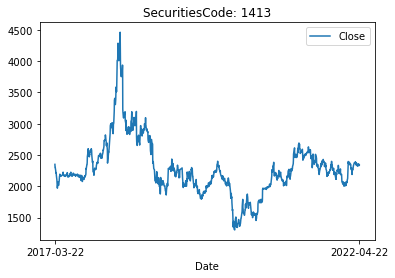

1243


In [70]:
render_col(pd.concat([prices, supplemental_prices]), 1413, ['Close'])

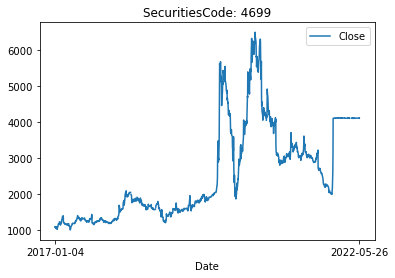

1316


In [71]:
render_col(pd.concat([prices, supplemental_prices]), 4699, ['Close'])

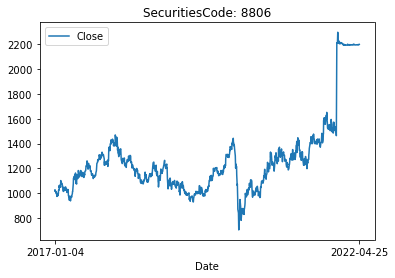

1297


In [72]:
render_col(pd.concat([prices, supplemental_prices]), 8806, ['Close'])

In [75]:
tmp = prices.copy()

In [76]:
tmp['dayofweeks'] = tmp['Date'].dt.dayofweek

In [78]:
tmp[tmp['SecuritiesCode'] == 1301].head(20)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,dayofweeks
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,2
1865,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920,3
3730,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092,4
5595,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100,1
7460,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295,2
9325,20170112_1301,2017-01-12,1301,2745.0,2747.0,2703.0,2731.0,28700,1.0,NaN,False,-0.006613,3
11190,20170113_1301,2017-01-13,1301,2707.0,2730.0,2707.0,2722.0,19400,1.0,NaN,False,-0.006657,4
13055,20170116_1301,2017-01-16,1301,2725.0,2725.0,2696.0,2704.0,20100,1.0,NaN,False,0.002978,0
14920,20170117_1301,2017-01-17,1301,2702.0,2704.0,2682.0,2686.0,18400,1.0,NaN,False,0.001856,1
16785,20170118_1301,2017-01-18,1301,2689.0,2695.0,2681.0,2694.0,12100,1.0,NaN,False,0.014079,2
